
1. load required packages 

2. load calibration files; .poni defining geometry and mask

3. define integrator function



In [91]:
import pyFAI
import baseline
import fabio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pygix as pg
#import mplcursors
# from scipy.interpolate import interp1d
# from scipy.signal import savgol_filter
# from scipy import sparse
# from scipy.signal import find_peaks
#from scipy.sparse.linalg import spsolve
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
from plotnine import *#ggplot, aes, geom_line, labs, theme, ggtitle

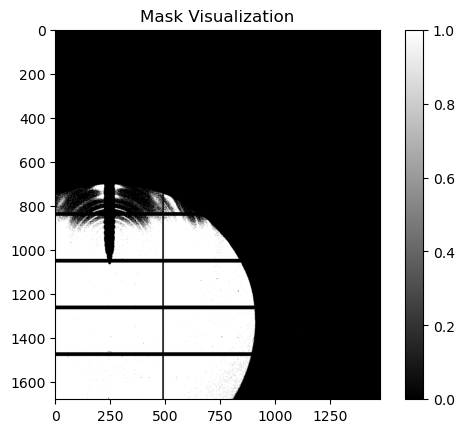

In [93]:
# load the calibration files and visualise mask


#2022 PONI and mask
# poni_file = "/home/goughl/Documents/beamtime_data/2204_DLS/processed data/AgBh_calib_2211/AgBh_calib_near_2211.poni"
 # this part done in pyFAI-calib2 GUI (see README)


#2023 PONI and mask
poni_file = "/home/goughl/Documents/beamtime_data/2304_DLS/calib/20keV_geometry.poni"
mask_file = "/home/goughl/Documents/beamtime_data/2304_DLS/calib/mask_AgBh.edf"
mask_data = fabio.open(mask_file).data
mask_data = 1 - mask_data
# # invert by commenting out this line

### NB if over half the pixels are masked, sometimes pyFAI automatically inverts the mask
### so be extra careful with MINERVA data since the small chamber window means half pixels should always be masked


calibration = pyFAI.load(poni_file)


plt.imshow(mask_data, cmap='gray')
plt.colorbar()
plt.title("Mask Visualization")
plt.show()
# black pixels masked, white pixels unmasked, make sure they're the correct way round!! 

In [87]:
# defining all functions to be used
# shouldn't need to change these


# integrator function with arguments defined in pyFAI documentation
integrator = AzimuthalIntegrator(
    detector=calibration.detector,
    wavelength=calibration.wavelength,
    dist=calibration.dist,  
    poni1=calibration.poni1,
    poni2=calibration.poni2,
    rot1=calibration.rot1,
    rot2=calibration.rot2,
    rot3=calibration.rot3
)

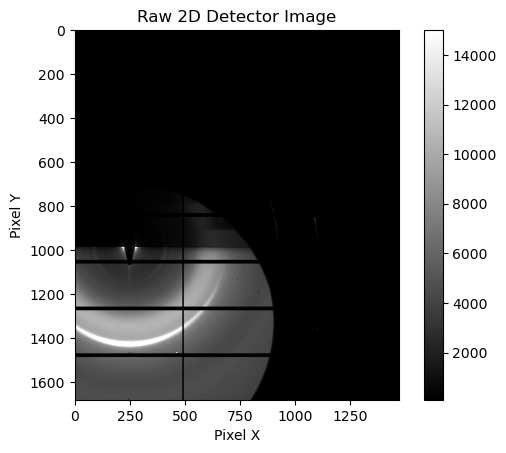

In [88]:
#plot the raw tif image

image = fabio.open("/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-3-MINERVA_DCV5T_HT/long_exposure/p2mImage1019682.tif")  # Replace with the actual path to your image file
data = image.data  

vmin = 100  # min intensity value
vmax = 15000  # max intensity value

# for long exposure images (t ~ 30 s) vmax ~ 15000
# for short exposure images (t ~ 3 s) vmax ~ 1000

plt.imshow(data, cmap='gray', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('Raw 2D Detector Image')
plt.show()

In [94]:
# check you're in the right folder 
# lists all the files in a directory and puts them in numerical order

folder_path = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-3-MINERVA_DCV5T_HT/long_exposure"

files = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename)) and filename.endswith('.tif')]
sorted_files = sorted(files, key=lambda x: int(x.split("p2mImage")[1].split(".")[0]))

for filename in sorted_files:
    print(filename)
    
    
### for long_exposure images, split filename "p2mImage"
### for timed_scan / DCV5T_40nm imafes, split filename last 7 characters of string

p2mImage1019282.tif
p2mImage1019375.tif
p2mImage1019426.tif
p2mImage1019492.tif
p2mImage1019541.tif
p2mImage1019585.tif
p2mImage1019630.tif
p2mImage1019682.tif


In [95]:
# # plotting raw image with mask applied


# detector_image_file = "/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-3-MINERVA_DCV5T_HT/long_exposure/p2mImage1019682.tif"  # Replace with the path to your detector image file
# detector_image = fabio.open(detector_image_file).data


# mask_file = "/home/goughl/Documents/beamtime_data/2304_DLS/calib/mask_AgBh.edf" # Replace with the path to your mask file
# mask_data = fabio.open(mask_file).data

# inverted_mask = ~mask_data

# masked_image = np.where(inverted_mask, detector_image, 0)


# vmin = 100  # min intensity value
# vmax = 15000  # max intensity value

# # plot the masked detector image with specified intensity range
# plt.imshow(masked_image, cmap='gray', vmin=vmin, vmax=vmax)
# plt.colorbar()
# #plt.title("Masked Detector Image")
# plt.show()

In [83]:
# # integrate and plot individual file

# data_file = "/home/goughl/Documents/beamtime_data/2204_DLS/data/EA_DCV5T_ver2/layer2_3_DCV5T/p2mImage_422055_803318.tif"
# data = fabio.open(data_file).data
# data = inverted_mask * data
# # uncomment the line above to mask

# q, I = integrator.integrate1d(data, 1000, unit="q_A^-1", azimuth_range=(60, 80), radial_range=(0.25, 3), polarization_factor=0.99)

# # 90 to 120 is out of plane i think??
# # 0 to 30 in plane? not 100% sure

# plt.plot(q, I)
# plt.xlabel("q (1/Å)")
# plt.ylabel("Intensity (a.u.)")
# plt.title("1D integration in-plane")
# plt.grid(True)
# plt.show()


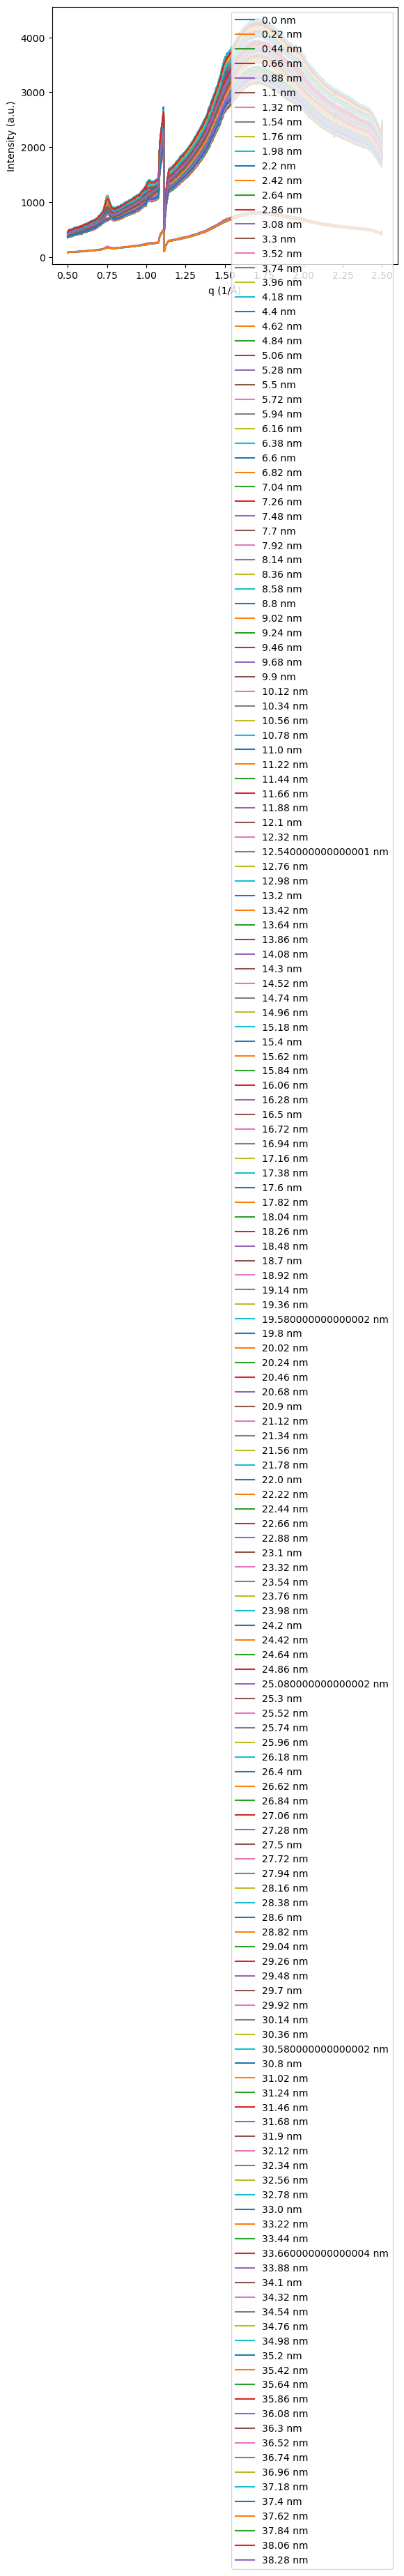

In [84]:
# 1D integrations of all files in a directory
# not normalised
####2023 data

### DCV5T RT
#folder_path = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230501-3-MINERVA_DCV5T_RT_ver2/DCV5T_40nm"



### DCV5T HT

#folder_path = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-3-MINERVA_DCV5T_HT/DCV5T_40nm"
#folder_path = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230501-1-MINERVA_DCV5T_HT_ver2/DCV5T_40nm"



### EA / DCV5T HT

folder_path = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230429-4-MINERVA_EA_DCV5T_HT/DCV5T_40nm"
#folder_path = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230427-3_MINERVA_EA_DCV5T-HT/DCV5T_40nm"


### blends

#folder_path = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230430-1-MINERVA_blend_DCV5T_C60/no_scattering"

#output_folder = r"/home/goughl/Documents/beamtime_data/2304_DLS/raw_data/230501-1-MINERVA_DCV5T_HT_ver2/long_exposure"  # Specify the desired output folder
# enter the filepath where you want the CSVs to be saved


#2022 data

### EA / DCV5T RT
#folder_path = r"/home/goughl/Documents/beamtime_data/2204_DLS/data/EA_DCV5T:C60/layer2_DCV5T:C60"



# for the label, divide total thickness by number of images, 
# and multiply by i to get thickness of film at any given point
# there is a better way to implement this but my brain is fried


qs = []
Is = []
labels = []


for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        data = fabio.open(os.path.join(folder_path, filename)).data
       # data = np.where(inverted_mask, data, 0)
        ######## can't get the mask to behave properly
        q, I = integrator.integrate1d(data, 1000, unit="q_A^-1", azimuth_range=(0, 15), radial_range=(0.5, 2.5), polarization_factor=0.99)
        label = 0.22 * len(qs) # updates label by adding increment on in nm
        qs.append(q)
        Is.append(I)
        labels.append(label)


# OoP azimuth_range = (70, 85)
# IP azimuth_range = (0, 15)
        
        
save = False
# change to true when you want to save the files

if save == True:
    for filename, q, I, label in zip(os.listdir(folder_path), qs, Is, labels):
        data = {'q': q, 'Intensity': I}
        df = pd.DataFrame(data)
        base_filename = os.path.splitext(filename)[0]  
        output_filename = os.path.join(output_folder, f"integration_{base_filename}_{label}nm_unnormalised.csv")
        df.to_csv(output_filename, index=False)

        plt.plot(q, I, label=f"{label} nm")        
else:
    for q, I, label in zip(qs, Is, labels):
        plt.plot(q, I, label=f"{label} nm")

plt.xlabel("q (1/Å)")
plt.ylabel("Intensity (a.u.)")
#plt.title("1D integration out of plane \n DCV5T HT ")

#plt.legend()
plt.show()

                0.501     0.503     0.505     0.507     0.509     0.511  \
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501     0.503     0.505     0.507     0.509     0.511   
                0.501    

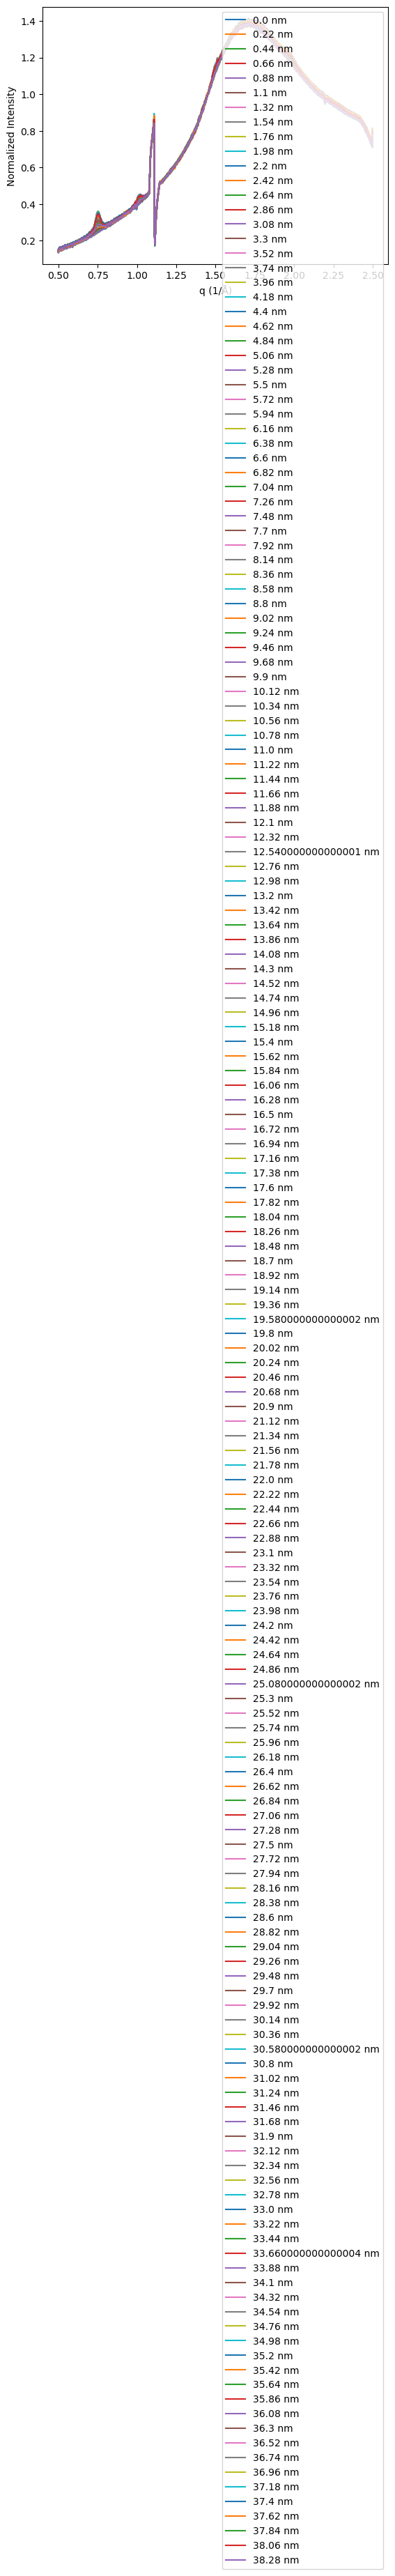

In [96]:
#### HEY GREY!! this is the spot i'm having trouble with
# I basically just want to do an integration of every file in given folder in a particular direction (azimuth_range in this code)
# then normalise it, then output the resulting normalised integrations as a function of q space into a dataframe
# then I'd like to save it as a csv which is the easy bit


# normalising to a chosen point in q space, where you expect to see nothing

background_q = 1.5 # choose a q value where there is only background
bg_range = 0.05 # choose a small range of which background_q is the centre to average

normalized_intensities = []
peak_coordinates = []

for i, (q, I) in enumerate(zip(qs, Is)):
    max_peak = min(I[(q > background_q - bg_range) & (q < background_q + bg_range)])
    max_index = np.argmin(I[(q > background_q - bg_range) & (q < background_q + bg_range)])
    q_max_peak = q[(q > background_q - bg_range) & (q < background_q + bg_range)][max_index]

    normalized_intensity = I / max_peak
    normalized_intensities.append(normalized_intensity)
    peak_coordinates.append((q_max_peak, max_peak))

    plt.plot(q, normalized_intensity, label=f"{labels[i]} nm")
#     df = pd.DataFrame(normalized_intensities, columns=qs)
#     df.index = [f"d = {i*0.11}nm" for i in range(len(normalized_intensities))] 

# to get the normalised intensities as fn of q into a dataframe should the df be inside or outside the loop??


df = pd.DataFrame(normalized_intensities, columns=qs)
df.index = [f"d = {i*0.11}nm" for i in range(len(normalized_intensities))]
# for the label, divide total thickness by number of images, 
# and multiply by i to get thickness of film at any given point


print(df) 

output = r"/home/goughl/Documents/GIWAXS_analysis_notebooks/templating_paper/normalised_data/OoP_norm_230429-4_EA_DCV5T_HT.csv"


df.to_csv(output, index=False)


plt.xlabel("q (1/Å)")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.show()


# for i, (q_max_peak, max_peak) in enumerate(peak_coordinates):
#     print(f"Peak {i + 1} coordinates: q = {q_max_peak:.4f}, I = {max_peak:.4f}")


In [ ]:
# # normalised data in pretty plotnine plot

# df = pd.DataFrame({'q': q1, 'I_norm': I_norm1, 'Sample': ['C60 / EA / DCV5T']*len(q1)})
# df2 = pd.DataFrame({'q': q2, 'I_norm': I_norm2, 'Sample': ['C60 / DCV5T']*len(q2)})
# df3 = pd.DataFrame({'q': q3, 'I_norm': I_norm3, 'Sample': ['C60 / EA / DCV5T:C60']*len(q3)})
# df4 = pd.DataFrame({'q': q4, 'I_norm': I_norm4, 'Sample': ['C60 / DCV5T:C60']*len(q4)})
# df = pd.concat([df, df2], axis=0)


# plot = (ggplot(df, aes(x='q', y='I_norm', color='Sample'))
#         + geom_line()
#         + labs(x='q (1/Å)', y='Normalised intensity')
#         + ggtitle('1D integration out of plane of DCV5T')
#         #+ theme_classic()
#         + theme(plot_title=element_text(size=14, weight='bold'),
#                 legend_title=element_text(size=10),
#                 legend_text=element_text(size=8),
#                 axis_text=element_text(size=10),
#                 axis_title=element_text(size=12))
#        )

# plot


In [ ]:
# df = pd.concat([df3, df4], axis=0)

# plot = (ggplot(df, aes(x='q', y='I_norm', color='Sample'))
#         + geom_line()
#         + xlab('q (1/Å)')
#         + ylab('Normalised intensity')
#         + ggtitle('1D integration out of plane DCV5T:C60 [2:1]')
#         #+ theme_classic()
#         + theme(plot_title=element_text(size=14, weight='bold'),
#                 legend_title=element_text(size=10),
#                 legend_text=element_text(size=8),
#                 axis_text=element_text(size=10),
#                 axis_title=element_text(size=12))
#        )

# plot

*To do:*

- make ```baseline``` package work
- remove baselines using ```asymmetric_least_squares``` function
- do in plane and out of plane plots for donor and blend pairs
